# Simple example R code for making circos plots in notebooks

In [1]:
library('circlize')
library('dendextend')

circlize version 0.4.5
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: http://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization 
  in R. Bioinformatics 2014.



In [2]:
set.seed(999)
n = 1000
a = data.frame(factor = sample(letters[1:8], n, replace = TRUE),
x = rnorm(n), y = runif(n))

# Basic Circos plot

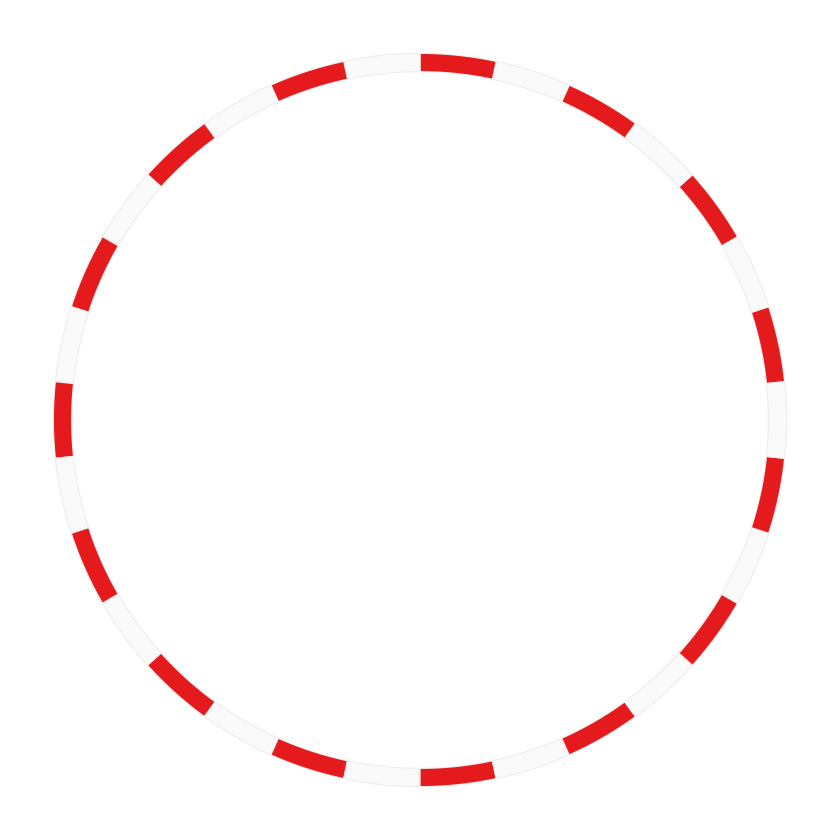

In [3]:
num_sectors <- 30
factors = 1:num_sectors # just indicate there are 20 sectors
circos.par(gap.degree = 0, cell.padding = c(0, 0, 0, 0),
start.degree = 360/num_sectors/2, track.margin = c(0, 0), clock.wise = FALSE)
circos.initialize(factors = factors, xlim = c(0, 1))
# circos.trackPlotRegion(ylim = c(0, 1), factors = factors, bg.col = "black",
# track.height = 0.15)
# circos.trackText(rep(0.5, num_sectors), rep(0.5, num_sectors),
# labels = c(13, 4, 18, 1, 20, 5, 12, 9, 14, 11, 8, 16, 7, 19, 3, 17, 2, 15, 10, 6),
# factors = factors, col = "#EEEEEE", font = 2, facing = "downward")
circos.trackPlotRegion(ylim = c(0, 1), factors = factors,
bg.col = rep(c("#E41A1C", "#FAFAFA"), num_sectors/2), bg.border = "#EEEEEE", track.height = 0.05)

# Circular bar plots

Warning message in warning_wrap("'start.degree' can only be modified before `circos.initialize`, or maybe you forgot to call `circos.clear` in your last plot."):
"'start.degree' can only be modified before `circos.initialize`, or
maybe you forgot to call `circos.clear` in your last plot."

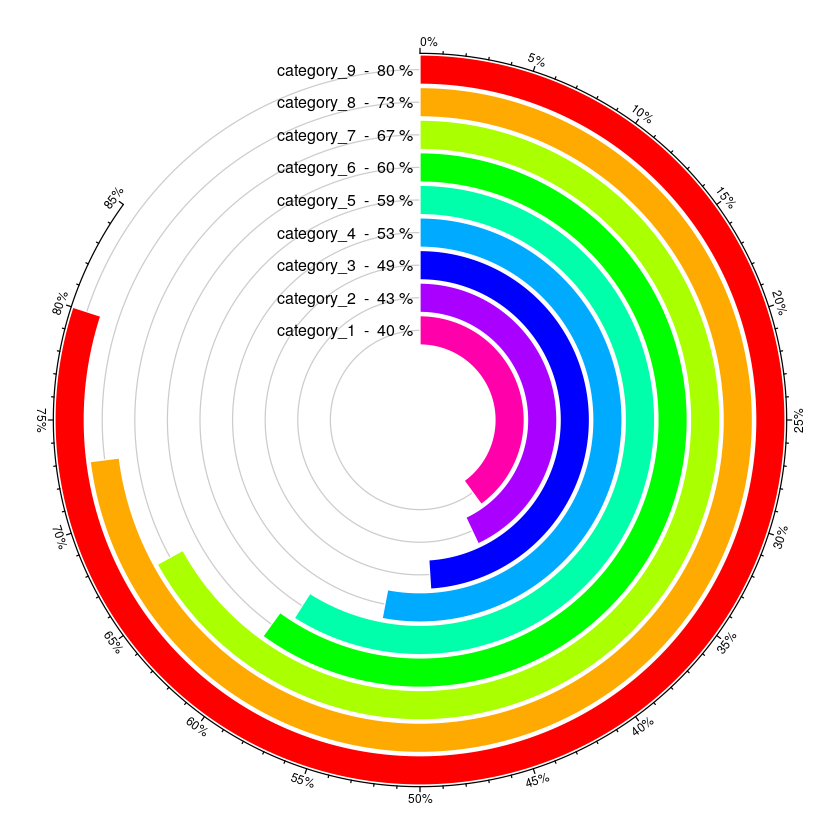

In [4]:
category = paste0("category", "_", 1:9)
percent = sort(sample(40:80, 9))
color = rev(rainbow(length(percent)))
circos.par("start.degree" = 90, cell.padding = c(0, 0, 0, 0))
circos.initialize("a", xlim = c(0, 100)) # 'a` just means there is one sector
circos.track(ylim = c(0.5, length(percent)+0.5), track.height = 0.8, 
    bg.border = NA, panel.fun = function(x, y) {
        xlim = CELL_META$xlim
        circos.segments(rep(xlim[1], 9), 1:9,
                        rep(xlim[2], 9), 1:9,
                        col = "#CCCCCC")
        circos.rect(rep(0, 9), 1:9 - 0.45, percent, 1:9 + 0.45,
            col = color, border = "white")
        circos.text(rep(xlim[1], 9), 1:9, 
            paste(category, " - ", percent, "%"), 
            facing = "downward", adj = c(1.05, 0.5), cex = 0.8) 
        breaks = seq(0, 85, by = 5)
        circos.axis(h = "top", major.at = breaks, labels = paste0(breaks, "%"), 
            labels.cex = 0.6)
})

# Histograms

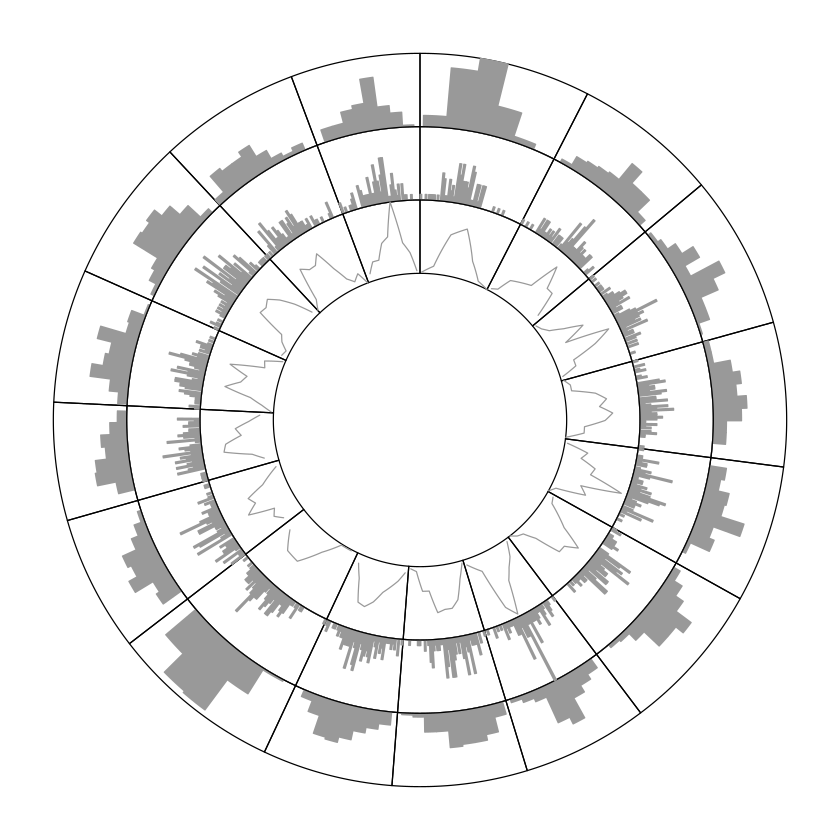

In [5]:
x = rnorm(1600)
factors = sample(letters[1:16], 1600, replace = TRUE)
circos.initialize(factors = factors, x = x)
circos.trackHist(factors = factors, x = x, col = "#999999", 
    border = "#999999")
circos.trackHist(factors = factors, x = x, bin.size = 0.1, 
    col = "#999999", border = "#999999")
circos.trackHist(factors = factors, x = x, draw.density = TRUE, 
    col = "#999999", border = "#999999")

# Phylogenetic trees

In [6]:
library(ape)
data(bird.orders)
hc = as.hclust(bird.orders)

In [7]:
labels = hc$labels  # name of birds
ct = cutree(hc, 6)  # cut tree into 6 pieces
n = length(labels)  # number of bird species
dend = as.dendrogram(hc)

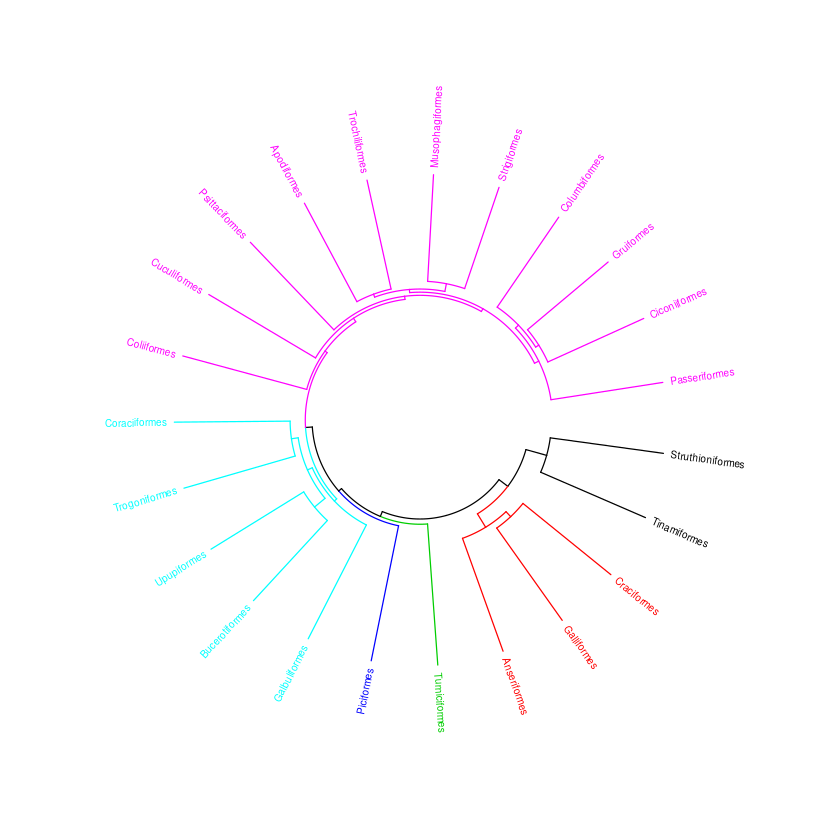

In [13]:
circos.par(cell.padding = c(0, 0, 0, 0))
circos.initialize(factors = "a", xlim = c(0, n)) # only one sector
circos.track(ylim = c(0, 1), bg.border = NA, track.height = 0.3, 
    panel.fun = function(x, y) {
        for(i in seq_len(n)) {
            circos.text(i-0.5, 0, labels[i], adj = c(0, 0.5), 
                facing = "clockwise", niceFacing = TRUE,
                col = ct[labels[i]], cex = 0.5)
        }
})
dend = color_branches(dend, k = 6, col = 1:6)
dend_height = attr(dend, "height")
circos.track(ylim = c(0, dend_height), bg.border = NA, 
    track.height = 0.4, panel.fun = function(x, y) {
        circos.dendrogram(dend)
})
circos.clear()